# Netflix Titles- Assignment 1

# This notebook investigates which countries contribute the most titles and how that has changed over time.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("../netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Dictionary  
show_id: movie ID number
type: movie or TV show
title: title of the media
director: maker of the media 
cast: actors in the portrayed media
country: location of film 
date_added: date added to the dataset
release_year: year the media was released
rating: rating of the content e.g. PG-13, R
duration: length of the media
listed_in: genre of media
description: short summary of the media 

In [50]:
# Cleaning

# Drop duplicates and check for missing values
df = df.drop_duplicates()
df.isnull().sum()

# Drop rows with missing countries and clean white space
df = df.dropna(subset=["country"])
df["country"] = df["country"].str.strip()


In [51]:
# My function: creates different "eras" for movies to further classify them
def create_movie_eras(year):
    if year < 1960:
        return "Vintage"
    elif 1960 <= year < 2000:
        return "Classic"
    elif 2000 <= year < 2020:
        return "Modern"
    else:
        return "Recent"
    
df["movie_era"] = df["release_year"].apply(create_movie_eras)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_era
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Recent
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Recent
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Recent
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Classic
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Recent


In [52]:
# Clean country column for analysis so I can use it for grouping 

def top_country(country):
    if pd.isna(country):
        return None
    return country.split(",")[0].strip()

df["top_country"] = df["country"].apply(top_country)

In [53]:
# Analysis feature 1: grouped summary, showing the top countries 

top_country_counts = df["top_country"].value_counts().head(10)
top_country_counts

top_country
United States     3211
India             1008
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Name: count, dtype: int64

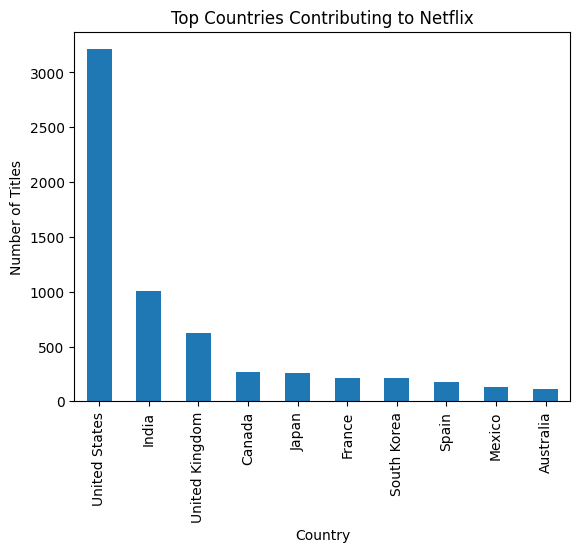

In [54]:
# Visual representation 1: Bar chart of top countries 

plt.figure()
top_country_counts.plot(kind="bar")
plt.title("Top Countries Contributing to Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

# This chart shows that United States contributes the most titles to Netflix by far. India and the UK also contribute a fair bit to netflix titles. 

In [55]:
# Analysis feature 2: Group comparison, comparing the eras of movies vs tv shows 

type_era = (
    df.dropna(subset=["movie_era"])
    .groupby(["type", "movie_era"])
    .size()
    .reset_index(name="count")
)

In [56]:
era_order = ["Vintage", "Classic", "Modern", "Recent"]
type_era["movie_era"] = pd.Categorical(type_era["movie_era"], categories=era_order, ordered=True)
type_era = type_era.sort_values("movie_era")

type_era = type_era.sort_values("movie_era")

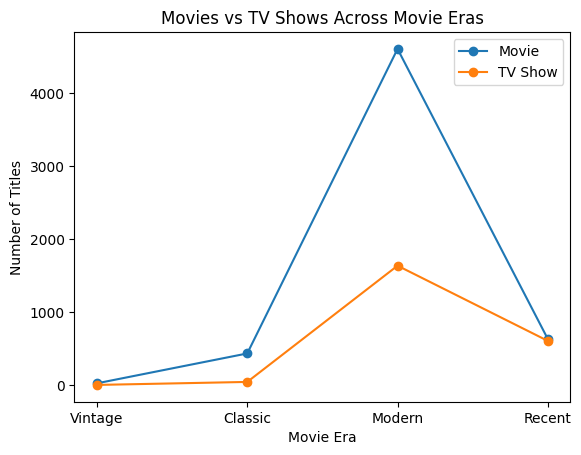

In [57]:
# Visual representation 2: Chart showing relationship, comparing movie eras for movies vs tv shows

plt.figure()
for t in type_era["type"].unique():
    data = type_era[type_era["type"] == t]
    plt.plot(data["movie_era"], data["count"], marker="o", label=t)

plt.title("Movies vs TV Shows Across Movie Eras")
plt.xlabel("Movie Era")
plt.ylabel("Number of Titles")
plt.legend()
plt.show()

# This relationship chart shows that Netflix contains far more movies than TV shows, but the fact that both contain more modern than anything else is true for both TV shows and movies. They both contain many modern titles, some recent and classic, and very little vintage. 